# nuscenes数据

https://www.yuque.com/huangzhongqing/hre6tf/ckq1rl
https://blog.csdn.net/Snape_/article/details/108836460?


In [2]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
# 这里需要将dataroot改成自己的数据集下载目录。
nusc = NuScenes(version='v1.0-mini', dataroot='/media/hcq/hcq4T/dataset/nuScenes/v1.0-mini', verbose=True)


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.331 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


即数据集相关信息。
* scene：场景-20秒的汽车行程片段
* sample：样本-特定时间戳的场景的标注快照
* sample_data：样本数据-从特定传感器采集的数据
* sample_annotation：样本标注-我们感兴趣的目标的标注实例
* instance：实例-枚举我们观察到的所有目标实例
* category：类别-目标类别的分类法（例如车辆、人）
* attribute：属性-在类别保持不变的情况下可以更改的实例的属性
* visibility：可见性-从6个不同摄像头采集的所有图像中可见的像素部分
* sensor：传感器-特定传感器类型
* calibrated sensor：校准传感器-在特定车辆上校准的特定传感器
* ego_pose：自主姿态-自主车辆载具在特定时间戳的姿态
* log：日志—从中提取数据的日志信息
* map：映射—从自顶向下的视图中存储为二进制语义掩码的映射数据

In [3]:
nusc.list_scenes() # 包含1000个场景的标注样本，每个场景约20s。

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [21]:
# 查看元数据
my_scene = nusc.scene[0] # 第一个场景
print("场景num {}".format(len(nusc.scene)))
print(my_scene['first_sample_token'])
my_scene


场景num 10
ca9a282c9e77460f8360f564131a8af5


{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

## 样本sample .json
标注频率：2Hz
定义样本（Sample）为给定时间戳的标注关键帧。
查看第一个带注释的示例：

In [5]:
first_sample_token = my_scene['first_sample_token'] #  'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',


In [7]:
''' 
# 参数1：各个表名
# 参数2：token
nusc.get('sample', first_sample_token)
'''
# nusc.get('sample', first_sample_token)
my_sample = nusc.get('sample', first_sample_token) # sample.json
my_sample # token，timestamp，data， data，  anns

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [8]:
# list_sample() 能够列出所有相关sample_data的关键帧和相关的sample_annotation：
nusc.list_sample(my_sample['token'])


Sample: ca9a282c9e77460f8360f564131a8af5

sample_data_token: 37091c75b9704e0daa829ba56dfa0906, mod: radar, channel: RADAR_FRONT
sample_data_token: 11946c1461d14016a322916157da3c7d, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 491209956ee3435a9ec173dad3aaf58b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 312aa38d0e3e4f01b3124c523e6f9776, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 07b30d5eb6104e79be58eadf94382bc1, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 9d9bf11fb0e144c8b446d54a8a00184f, mod: lidar, channel: LIDAR_TOP
sample_data_token: e3d495d4ac534d54b321f50006683844, mod: camera, channel: CAM_FRONT
sample_data_token: aac7867ebf4f446395d29fbd60b63b3b, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 79dbb4460a6b40f49f9c150cb118247e, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 03bea5763f0f4722933508d5999c5fd8, mod: camera, channel: CAM_BACK
sample_data_token: 43893a033f9c46d4a51b5e08a67a1eb7, mod: camera, channel:

## 样本数据 sample_data
对场景下的每个快照，提供从传感器收集的一系列数据的引用。

In [9]:
my_sample['data']


{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

In [15]:
# 从CAM_FRONT获取的一个示例：
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data



{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

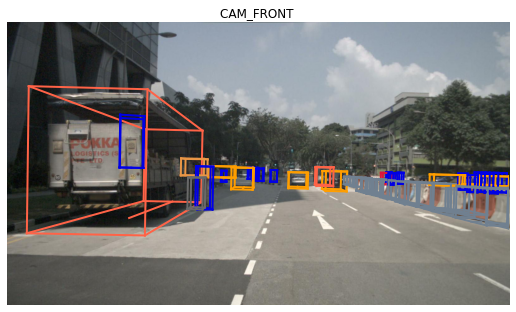

In [16]:
# 显示样本数据：(通过token)
nusc.render_sample_data(cam_front_data['token'])



## 样本标注sample_annotation（GT数据）


In [14]:
my_annotation_token = my_sample['anns'][18] # 
print(len(my_sample['anns'])) # 69个标注信息（障碍物）
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)

print(my_annotation_metadata['size'], my_annotation_metadata['rotation'])
my_annotation_metadata


69
[2.877, 10.201, 3.595] [-0.5828819500503033, 0.0, 0.0, 0.812556848660791]


{'token': '83d881a6b3d94ef3a3bc3b585cc514f8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': 'e91afa15647c4c4994f19aeb302c7179',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [409.989, 1164.099, 1.623],
 'size': [2.877, 10.201, 3.595],
 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791],
 'prev': '',
 'next': 'f3721bdfd7ee4fd2a4f94874286df471',
 'num_lidar_pts': 495,
 'num_radar_pts': 13,
 'category_name': 'vehicle.truck'}

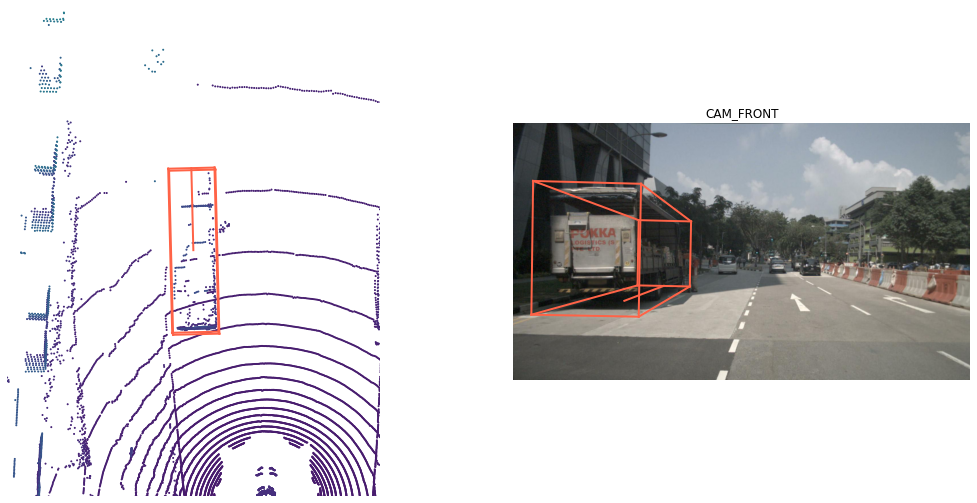

In [18]:
# 渲染注释以便于仔细观察：

nusc.render_annotation(my_annotation_token)


## 实例

In [21]:
# 目标实例：需要AV(Autonomous Vehicles) 检测或跟踪的实例。

my_instance = nusc.instance[599]
my_instance


{'token': '9cba9cd8af85487fb010652c90d845b5',
 'category_token': 'fedb11688db84088883945752e480c2c',
 'nbr_annotations': 16,
 'first_annotation_token': '77afa772cb4a4e5c8a5a53f2019bdba0',
 'last_annotation_token': '6fed6d902e5e487abb7444f62e1a2341'}

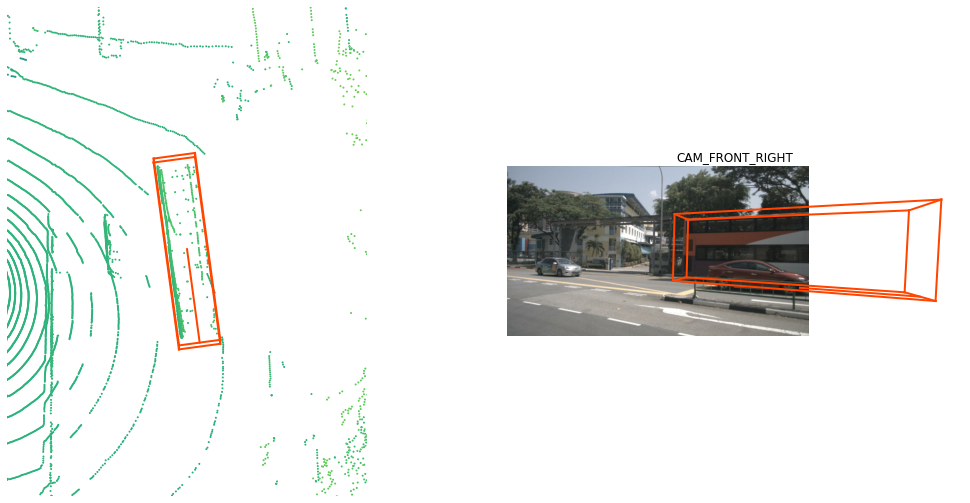

In [22]:
# 通常在特定场景跨不同帧跟踪，在特定场景为该实例提供16个带注释的示例。
instance_token = my_instance['token']
nusc.render_instance(instance_token)



First annotated sample of this instance:


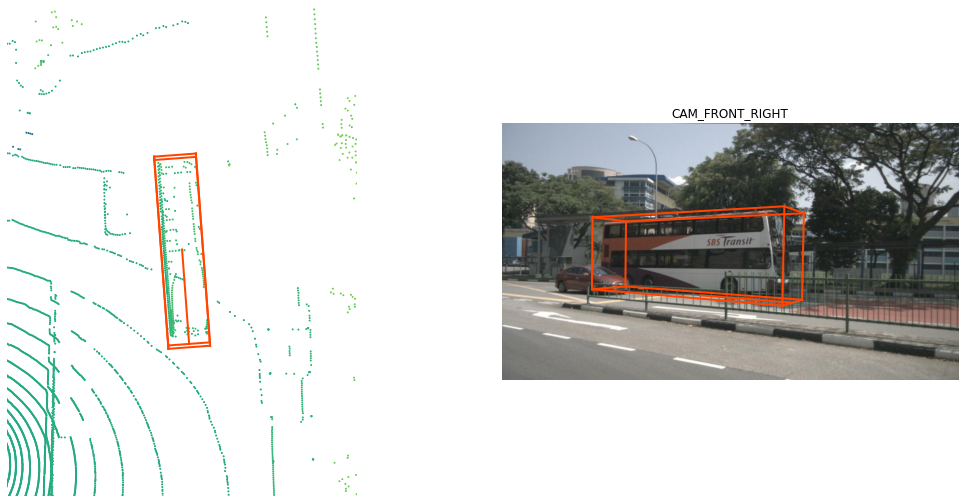

In [23]:
# 记录的第一个和最后一个标注：
print("First annotated sample of this instance:")
nusc.render_annotation(my_instance['first_annotation_token'])




Last annotated sample of this instance


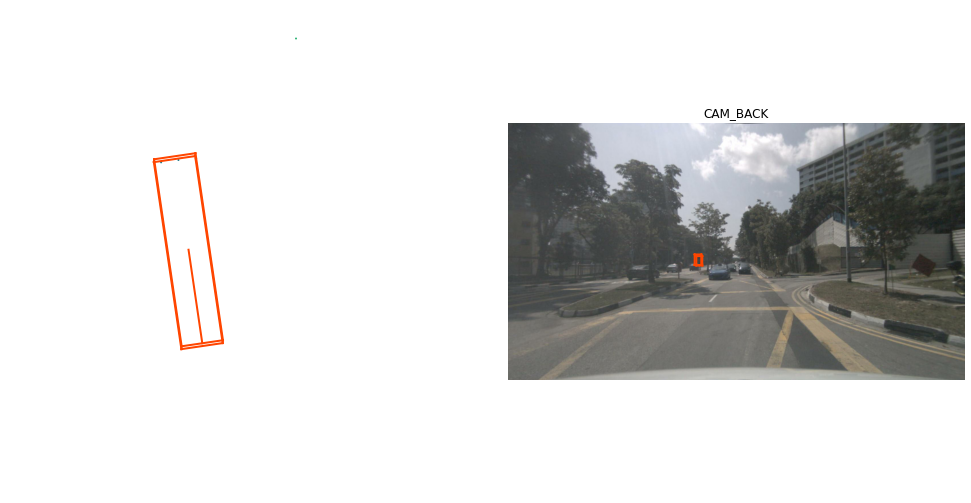

In [24]:
print("Last annotated sample of this instance")
nusc.render_annotation(my_instance['last_annotation_token'])


## 分类(23类)


In [25]:
nusc.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [26]:
# 单个目录
nusc.category[9]


{'token': 'dfd26f200ade4d24b540184e16050022',
 'name': 'vehicle.motorcycle',
 'description': 'Gasoline or electric powered 2-wheeled vehicle designed to move rapidly (at the speed of standard cars) on the road surface. This category includes all motorcycles, vespas and scooters.'}